In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import os

number_classes = 7 
rows=48
cols=48
batch_size = 16

train_data_direction = './dataset/train'
test_data_direction = './dataset/test'

#Using Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=30,
                                  shear_range=0.3,
                                  zoom_range=0.3,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
        train_data_direction,
        color_mode = 'grayscale',
        target_size = (rows , cols),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True)

test_generator = test_datagen.flow_from_directory(
        test_data_direction,
        color_mode = 'grayscale',
        target_size = (rows , cols),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True)



## Create Keras Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', input_shape=(rows,cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', input_shape=(rows,cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(512, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(512, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(1024, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(1024, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Softmax Activation in Output
model.add(Dense(number_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./checkpoint/emotion_model.h5",
                            monitor="val_loss",
                            mode="min",
                            save_best_only=True,
                            verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta = 0,
                         patience = 10,
                         verbose=1,
                         restore_best_weights = True)


reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

#Create callback list
callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(lr=0.001),
             metrics=['accuracy'])


total_train_samples = train_generator.samples
total_test_samples = test_generator.samples
epochs = 40


history = model.fit(
            train_generator,
            steps_per_epoch=total_train_samples // batch_size,
            epochs = epochs,
            callbacks = callbacks,
            validation_data = test_generator,
            validation_steps = total_test_samples // batch_size)

# To Resume Model Training

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator


number_classes = 7 
rows=48
cols=48
batch_size = 32

train_data_direction = './dataset/train'
test_data_direction = './dataset/test'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=30,
                                  shear_range=0.3,
                                  zoom_range=0.3,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

for i in range(100):

    checkpoint = ModelCheckpoint("./checkpoint/emotion_model.h5",
                                monitor="val_loss",
                                mode="min",
                                save_best_only=True,
                                verbose=1)
    
    earlystop = EarlyStopping(monitor = 'val_loss',
                             min_delta = 0,
                             patience = 10,
                             verbose=1,
                             restore_best_weights = True)
    
    
    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
    
    callbacks = [earlystop, checkpoint, reduce_lr]
    train_generator = train_datagen.flow_from_directory(
            train_data_direction,
            color_mode = 'grayscale',
            target_size = (rows , cols),
            batch_size = batch_size,
            class_mode = 'categorical',
            shuffle = True)
    
    test_generator = test_datagen.flow_from_directory(
            test_data_direction,
            color_mode = 'grayscale',
            target_size = (rows , cols),
            batch_size = batch_size,
            class_mode = 'categorical',
            shuffle = True)
    
    total_train_samples = train_generator.samples
    total_test_samples = test_generator.samples
    epochs = 40
    model = load_model('./checkpoint/emotion_model.h5')
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = Adam(lr=0.001),
                 metrics=['accuracy'])
    
    print(i)
    history = model.fit(
                train_generator,
                steps_per_epoch=total_train_samples // batch_size,
                epochs = epochs,
                callbacks = callbacks,
                validation_data = test_generator,
                validation_steps = total_test_samples // batch_size)

# OpenCV Integration + Simulation

In [ ]:
import cv2
import numpy as np
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
import pickle as pkl
from tensorflow.keras.models import load_model


class_labels = pkl.load(open('checkpoint/class_labels.pkl','rb'))
face_classifier = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
classifier = load_model('./checkpoint/emotion_model.h5')


def face_detector(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for(x,y,w,h) in faces:
        x = x-50
        w = w+50
        y = y-50
        h = h+50
        cv2.rectangle(img, (x,y), (x+w,y+h) , (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        
    try:
        roi_gray = cv2.resize(roi_gray, (48,48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face found", (20,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
        
    cv2.imshow('Emotion Detector', image)
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()
    
    
    
    
    
    


## Predict Single Picture

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import cv2
from os import listdir
from os.path import isfile, join
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import pickle as pkl

class_labels = pkl.load(open('checkpoint/class_labels.pkl','rb'))
face_classifier = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
classifier = load_model('./checkpoint/emotion_model.h5')


def face_detector(img):
    
    gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    allfaces = []
    rects = []
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48,48), interpolation = cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x,w,y,h))
    return rects,allfaces, img

def predict_image(img_path):
    img = cv2.imread(img_path)
    rects, faces, image = face_detector(img)
    i=0
    for face in faces:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]
        
        label_position = (rects[i][0] + int ((rects[i][1]/2)), abs(rects[i][2] - 10))
        i+=1
        cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
        
    image = image[:,:,::-1]
    return array_to_img(image)

#Example
img_path = 'test/image2.jpg'
predicted_image = predict_image(img_path)

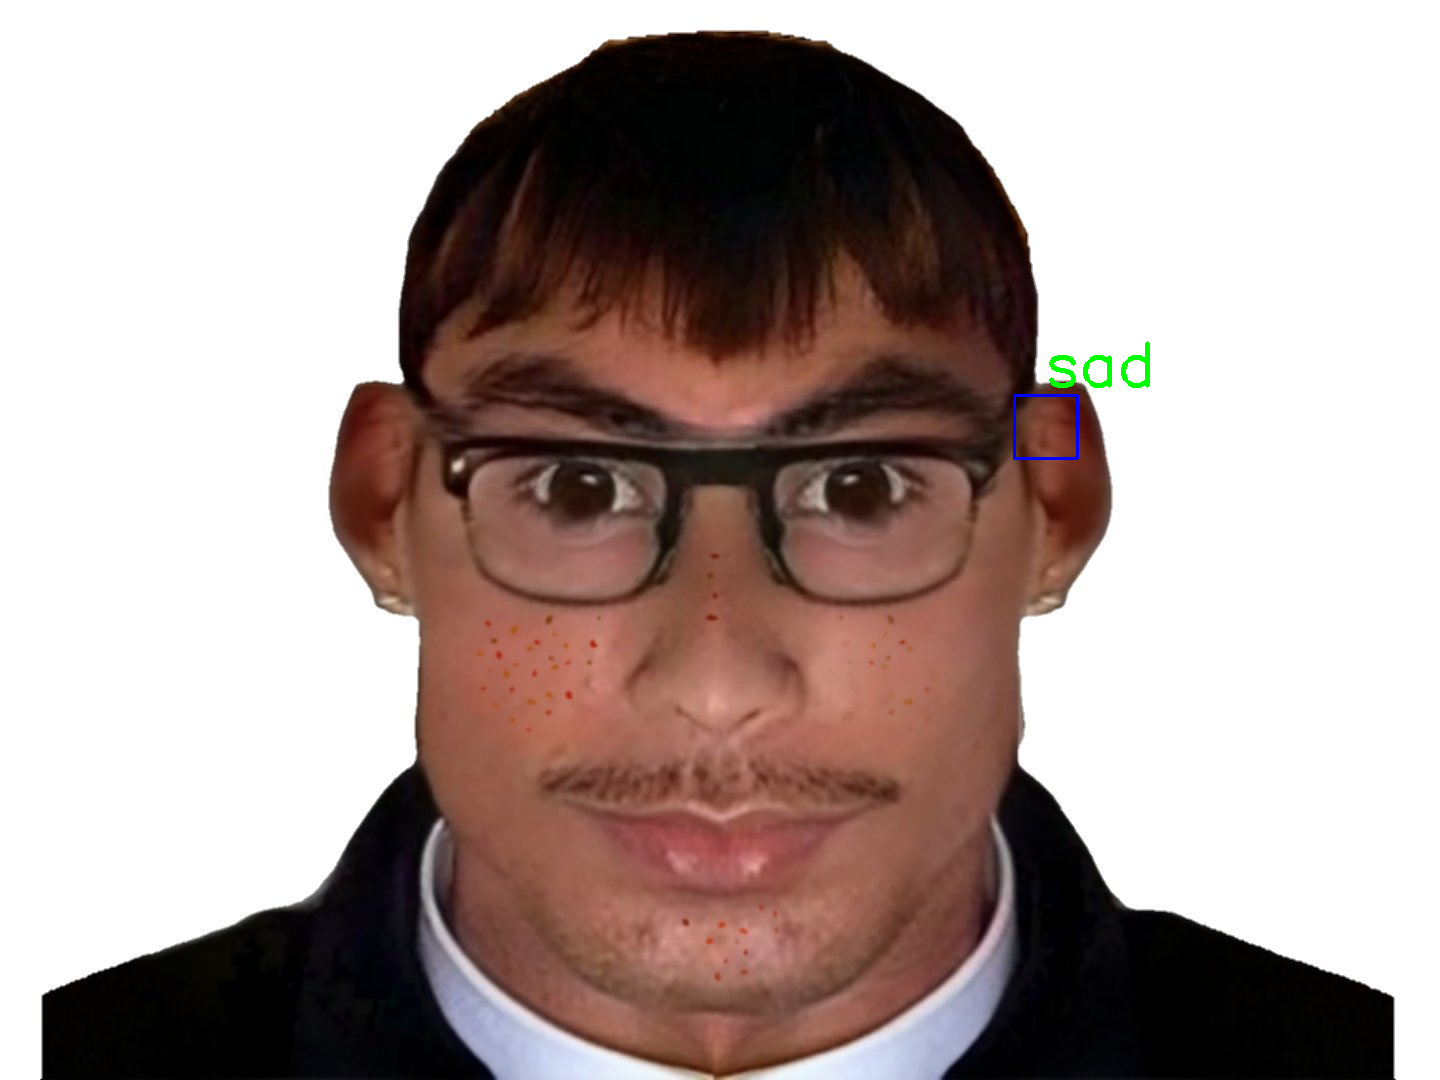

In [3]:
predicted_image